In [9]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import math
import pandas as pd
import imutils.paths as path
from tqdm import tqdm
import os
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
# import pip
# pip.main(['install','seaborn'])
sns.set()

In [10]:
enc = LabelEncoder()
datasets = pd.read_csv('F:/applications/python/Klasifikasi_Daun_Sawi/2_EKSTRAKSI_WARNA/datasetDataTesting.csv')
datasets['Label'] = enc.fit_transform(datasets['Label'].values)
datasets

,Citra,energy_0,homogenity_0,entrophy_0,contrast_0,energy_45,homogenity_45,entrophy_45,contrast_45,energy_90,...,entrophy_90,contrast_90,energy_135,homogenity_135,entrophy_135,contrast_135,Label,Warna_R,Warna_G,Warna_B
0,401.png,0.002990,11.476603,6.494680,10.476603,0.002110,22.548687,6.836035,21.548687,0.002909,...,6.524743,13.241239,0.002303,24.528671,6.778639,23.528671,0,0.006310,0.993176,0.000000
1,402.png,0.002303,6.354390,6.602114,5.354390,0.001512,23.012884,7.064604,22.012884,0.002020,...,6.785487,13.745073,0.001622,15.607363,6.977367,14.607363,0,0.003838,0.995415,0.000000
2,403.png,0.002125,9.262720,6.656178,8.262720,0.001531,18.871288,6.999450,17.871288,0.002341,...,6.546841,6.567868,0.001683,11.390106,6.835311,10.390106,0,0.010906,0.988445,0.000000
3,404.png,0.003164,4.226832,6.337473,3.226832,0.001955,11.316999,6.827815,10.316999,0.002600,...,6.494252,6.020403,0.002412,8.083870,6.570943,7.083870,0,0.004753,0.994560,0.000000
4,405.png,0.001978,7.612518,6.700894,6.612518,0.001547,14.457406,6.970232,13.457406,0.002218,...,6.588199,5.595334,0.001517,10.740952,6.948742,9.740952,0,0.007374,0.992096,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,496.png,0.001088,50.775371,7.613240,49.775371,0.000716,104.308305,8.007883,103.308305,0.001011,...,7.642005,46.355071,0.000879,74.801173,7.816338,73.801173,1,0.006104,0.982117,0.009972
196,497.png,0.000741,36.961629,7.810223,35.961629,0.000534,74.412248,8.135582,73.412248,0.000728,...,7.802012,35.176691,0.000580,62.102036,8.069667,61.102036,1,0.001957,0.997318,0.000259
197,498.png,0.000854,41.176505,7.729564,40.176505,0.000561,85.892614,8.115614,84.892614,0.000734,...,7.830550,45.031126,0.000607,73.970467,8.039630,72.970467,1,0.000000,0.999992,0.000004
198,499.png,0.001230,36.029123,7.377756,35.029123,0.000869,75.448798,7.713946,74.448798,0.001153,...,7.435106,40.266887,0.000889,62.543016,7.679444,61.543016,1,0.013554,0.935749,0.034882


In [11]:
datadaun = datasets.drop(columns= 'Label')
databersih = datadaun.drop(columns='Citra')
databersih

,energy_0,homogenity_0,entrophy_0,contrast_0,energy_45,homogenity_45,entrophy_45,contrast_45,energy_90,homogenity_90,entrophy_90,contrast_90,energy_135,homogenity_135,entrophy_135,contrast_135,Warna_R,Warna_G,Warna_B
0,0.002990,11.476603,6.494680,10.476603,0.002110,22.548687,6.836035,21.548687,0.002909,14.241239,6.524743,13.241239,0.002303,24.528671,6.778639,23.528671,0.006310,0.993176,0.000000
1,0.002303,6.354390,6.602114,5.354390,0.001512,23.012884,7.064604,22.012884,0.002020,14.745073,6.785487,13.745073,0.001622,15.607363,6.977367,14.607363,0.003838,0.995415,0.000000
2,0.002125,9.262720,6.656178,8.262720,0.001531,18.871288,6.999450,17.871288,0.002341,7.567868,6.546841,6.567868,0.001683,11.390106,6.835311,10.390106,0.010906,0.988445,0.000000
3,0.003164,4.226832,6.337473,3.226832,0.001955,11.316999,6.827815,10.316999,0.002600,7.020403,6.494252,6.020403,0.002412,8.083870,6.570943,7.083870,0.004753,0.994560,0.000000
4,0.001978,7.612518,6.700894,6.612518,0.001547,14.457406,6.970232,13.457406,0.002218,6.595334,6.588199,5.595334,0.001517,10.740952,6.948742,9.740952,0.007374,0.992096,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.001088,50.775371,7.613240,49.775371,0.000716,104.308305,8.007883,103.308305,0.001011,47.355071,7.642005,46.355071,0.000879,74.801173,7.816338,73.801173,0.006104,0.982117,0.009972
196,0.000741,36.961629,7.810223,35.961629,0.000534,74.412248,8.135582,73.412248,0.000728,36.176691,7.802012,35.176691,0.000580,62.102036,8.069667,61.102036,0.001957,0.997318,0.000259
197,0.000854,41.176505,7.729564,40.176505,0.000561,85.892614,8.115614,84.892614,0.000734,46.031126,7.830550,45.031126,0.000607,73.970467,8.039630,72.970467,0.000000,0.999992,0.000004
198,0.001230,36.029123,7.377756,35.029123,0.000869,75.448798,7.713946,74.448798,0.001153,41.266887,7.435106,40.266887,0.000889,62.543016,7.679444,61.543016,0.013554,0.935749,0.034882


In [12]:
datalabel = datasets['Label']
datalabel.value_counts()

Label
0    100
1    100
Name: count, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer


vec = TfidfVectorizer(lowercase=True)
X = vec.fit_transform(datadaun["Citra"])

xtrain, xtest, ytrain, ytest = train_test_split(databersih, datalabel, test_size=0.3, random_state=15)
tree_dataset = DecisionTreeClassifier(random_state=15)
tree_dataset.fit(xtrain, ytrain)

DecisionTreeClassifier(random_state=15)

Nilai Akurasi Algoritma C4.5
Akurasi               precision    recall  f1-score   support

           0       0.84      0.84      0.84        25
           1       0.89      0.89      0.89        35

    accuracy                           0.87        60
   macro avg       0.86      0.86      0.86        60
weighted avg       0.87      0.87      0.87        60

Tingkat Akurasi : 86 persen


Confusion Matrix


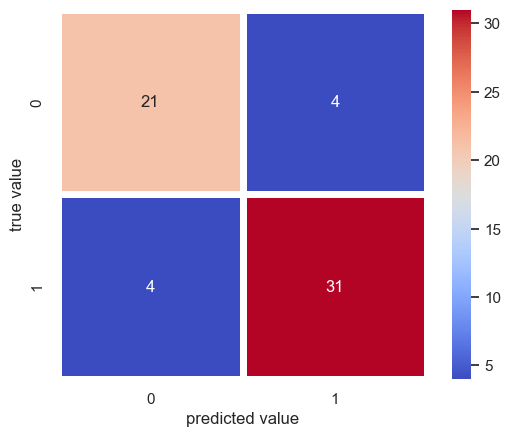

In [14]:
import warnings
warnings.filterwarnings('always') 

yprediction = tree_dataset.predict(xtest)
cm = confusion_matrix(ytest, yprediction)



nilaiakurasi = classification_report(ytest, yprediction)
print("Nilai Akurasi Algoritma C4.5")
print("Akurasi", nilaiakurasi)

nilaiakurasi = accuracy_score(ytest, yprediction)
print("Tingkat Akurasi : %d persen" %(nilaiakurasi*100))

print('\n')
print("Confusion Matrix")
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True, cmap='coolwarm', linewidths=5)
plt.xlabel('predicted value')
plt.ylabel('true value')
plt.show()